<a href="https://colab.research.google.com/github/JSJeong-me/GPT-Agent/blob/main/Fuzzy/Fuzzy-Control01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy matplotlib numpy

Step-by-Step Example: Fuzzy Logic Temperature Control System

Explanation:
Antecedent (temperature): Input variable with three categories: cold, warm, hot.

Consequent (fan_speed): Output variable with three categories: low, medium, high.

Rules: Link the inputs and outputs logically.

Fuzzification & Defuzzification: Handled internally by scikit-fuzzy.

Fan speed recommendation: 61.48%


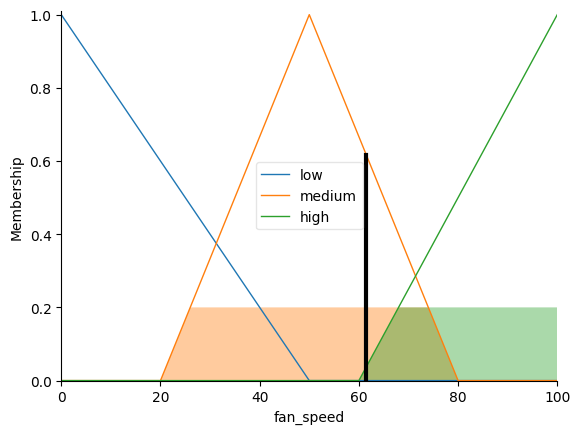

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# 2. Define fuzzy membership functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [20, 50, 80])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

# 3. Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

# 4. Create control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_simulation = ctrl.ControlSystemSimulation(fan_ctrl)

# 5. Provide an input value
fan_simulation.input['temperature'] = 28  # input temperature in Celsius

# 6. Compute fuzzy result
fan_simulation.compute()

# 7. Display the output
print(f"Fan speed recommendation: {fan_simulation.output['fan_speed']:.2f}%")
fan_speed.view(sim=fan_simulation)
plt.show()
